In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import pandas as pd

In [2]:
def get_returns(returns_no):
    returns_dict= {1: 'https://raw.githubusercontent.com/Kloppel/Thesis/master/resources/n120-d754-returns.csv',
                   2: 'https://raw.githubusercontent.com/Kloppel/Thesis/master/resources/n120-d755-returns-vcr.csv',
                   3: 'https://raw.githubusercontent.com/Kloppel/Thesis/master/resources/n20-d503-returns.csv',
                   4: 'https://raw.githubusercontent.com/Kloppel/Thesis/master/resources/n10-d251-returns.csv',
                   5: 'https://raw.githubusercontent.com/Kloppel/Thesis/master/resources/n10-d503-returns.csv',}
    returns = pd.read_csv(returns_dict[returns_no], index_col='Date', parse_dates=['Date']).iloc[1:, :]
    return returns

In [3]:
def my_plot_scatter(axes, Q, model_numbers, data, **kwargs):
    for model_n in model_numbers:
        ax = axes[model_n]
        sns.lmplot(x=Y_T.iloc[1,:], y=data[f'Q{Q}_K{model_n}'].iloc[1,:], ax=ax, kind="reg", truncate=False)
        ax.set_title(f'scatterplot Q={Q} K={model_n}')
        ax.set_xlabel('Data')
        ax.set_ylabel('Predictions')
        if 'xlim' in kwargs.keys(): ax.set_xlim(kwargs['xlim'])

def scatter(Q, data, model_numbers, **kwargs):
    n_cols = 3
    n_rows = 2
    #ax = axes[row, col]
    fig, axes = plt.subplots(figsize=(30,30))
    if kwargs.get('gplvm') is not None:
        #my_plot_scatter(axes, Q, model_numbers, data, postlabel='-gplvm', **kwargs)
        postlabel='-gplvm'
        for model_n in model_numbers:
            ax = axes[model_n]
            sns.lmplot(x=Y_T.iloc[1,:], y=data[f'Q{Q}_K{model_n}'].iloc[1,:], ax=ax, kind="reg", truncate=False)
            ax.set_title(f'scatterplot Q={Q} K={model_n}')
            ax.set_xlabel('Data')
            ax.set_ylabel('Predictions')
            if 'xlim' in kwargs.keys(): ax.set_xlim(kwargs['xlim'])
    if kwargs.get('studt') is not None:
        #my_plot_scatter(axes, Q, model_numbers, data, postlabel='-studt', **kwargs)
        postlabel='-studt'
        for model_n in model_numbers:
            ax = axes[model_n]
            sns.lmplot(x=Y_T.iloc[1,:], y=data[f'Q{Q}_K{model_n}'].iloc[1,:], ax=ax, kind="reg", truncate=False)
            ax.set_title(f'scatterplot Q={Q} K={model_n}')
            ax.set_xlabel('Data')
            ax.set_ylabel('Predictions')
            if 'xlim' in kwargs.keys(): ax.set_xlim(kwargs['xlim'])
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plt.show()

In [7]:
fig, axes = sns.FacetGrid()

TypeError: __init__() missing 1 required positional argument: 'data'

In [32]:
def my_plot_dist(ax, Q, model_numbers, data, variable, **kwargs):
    for model_n in model_numbers:
        sns.distplot(data[f'Q{Q}_K{model_n}'].loc[:,variable], ax=ax, 
                     norm_hist=True, hist=False, 
                     label=models[model_n]+kwargs.get('postlabel', ''))
    ax.set_title(f'{variable} Q={Q}')
    if 'vline' in kwargs.keys(): ax.axvline(x=kwargs['vline'], color='k')
    if 'xlim' in kwargs.keys(): ax.set_xlim(kwargs['xlim'])

def plot_variable(variable, model_numbers, **kwargs):
    n_cols = 3
    n_rows = 2
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20,4*n_rows))
    for Q in range(1, Q_max+1):
        col = ((Q+n_rows)%n_cols)
        row = ((Q+n_rows)//n_cols)-1
        ax = axes[row, col]
        if kwargs.get('gplvm') is not None:
            my_plot_dist(ax, Q, model_numbers, data_gplvm, variable, postlabel='-gplvm', **kwargs)
        if kwargs.get('studt') is not None:
            my_plot_dist(ax, Q, model_numbers, data_studt, variable, postlabel='-studt', **kwargs)
        if kwargs.get('vola') is not None:
            my_plot_dist(ax, Q, model_numbers, data_studt, variable, postlabel='-vola', **kwargs)
        if kwargs.get('time') is not None:
            my_plot_dist(ax, Q, model_numbers, data_studt, variable, postlabel='-time', **kwargs)
        if kwargs.get('timet') is not None:
            my_plot_dist(ax, Q, model_numbers, data_studt, variable, postlabel='-time-t', **kwargs)
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plt.show()

# Compare large GPLVM with large STUDT

In [4]:
models = {1:'linear', 2:'sq', 3:'exp', 4:'mat32', 5:'mat52'}
Q_max, N = 6, 120
path_gplvm_10 = f'gplvm_finance/2010-N120-D754/'
path_studt_10 = f'student-t/2010-N120-D754/'

returns = get_returns(returns_no=1)
Y = returns.T.values
N,D=Y.shape
Y_T = pd.DataFrame(Y, index=range(1,N+1), columns = range(1,D+1))

data_gplvm, data_studt = {}, {}
for q in range(1, Q_max+1):
    for model_n in models.keys():
        data_gplvm[f'Q{q}_K{model_n}'] = pd.read_csv(path_gplvm_10+f'diagnostics/comparison_Q{q}_kernel{model_n}.csv')
        data_studt[f'Q{q}_K{model_n}'] = pd.read_csv(path_studt_10+f'diagnostics/comparison_Q{q}_kernel{model_n}.csv')

Yhat_gplvm, Yhat_studt, noise_gplvm,  noise_studt, std_gplvm, std_studt, K_gplvm, K_studt, X_gplvm, X_studt, t_nu= {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}
for q in range(1,Q_max+1):
    for model_n in models.keys():
        Yhat_gplvm[f'Q{q}_K{model_n}'] = pd.read_csv(path_gplvm_10+f'samples/Y_hat-Q{q}-kernel{model_n}.csv')
        Yhat_studt[f'Q{q}_K{model_n}'] = pd.read_csv(path_studt_10+f'samples/Y_hat-Q{q}-kernel{model_n}.csv')
        noise_gplvm[f'Q{q}_K{model_n}'] = pd.read_csv(path_gplvm_10+f'samples/noise_std_Q{q}_kernel{model_n}.csv')
        noise_studt[f'Q{q}_K{model_n}'] = pd.read_csv(path_studt_10+f'samples/noise_std_Q{q}_kernel{model_n}.csv')
        std_gplvm[f'Q{q}_K{model_n}'] = pd.read_csv(path_gplvm_10+f'samples/kernel_std_Q{q}_kernel{model_n}.csv')
        std_studt[f'Q{q}_K{model_n}'] = pd.read_csv(path_studt_10+f'samples/kernel_std_Q{q}_kernel{model_n}.csv')
        K_gplvm[f'Q{q}_K{model_n}'] = pd.read_csv(path_gplvm_10+f'samples/K_Q{q}_kernel{model_n}.csv')
        K_studt[f'Q{q}_K{model_n}'] = pd.read_csv(path_studt_10+f'samples/K_Q{q}_kernel{model_n}.csv')
        X_gplvm[f'Q{q}_K{model_n}'] = pd.read_csv(path_gplvm_10+f'samples/X_Q{q}_kernel{model_n}.csv')
        X_studt[f'Q{q}_K{model_n}'] = pd.read_csv(path_studt_10+f'samples/X_Q{q}_kernel{model_n}.csv')

In [5]:
print(data_gplvm['Q1_K1'].shape)
data_gplvm['Q1_K1'].head()

(119, 4)


,N,R_2_fit,slope_fit,intercept_fit
0,0,0.314881,0.640169,0.000674
1,1,0.090749,0.181683,0.000896
2,2,0.101513,0.333708,0.002270
3,3,0.447148,0.892894,-0.000015
4,4,0.354276,0.418696,0.000506


In [6]:
print(Yhat_gplvm['Q1_K1'].shape)
Yhat_gplvm['Q1_K1'].head()

(120, 753)


,D,0,1,2,3,4,5,6,7,8,...,742,743,744,745,746,747,748,749,750,751
0,0,0.063976,0.002998,-0.020704,-0.011890,0.002552,-0.015007,-0.014058,0.040036,0.006041,...,-0.013959,-0.015577,-0.032475,0.007756,0.004427,0.016245,0.000256,-0.003807,-0.007213,-0.015370
1,1,0.013909,0.002066,0.011424,-0.036415,0.020277,-0.009523,-0.007283,0.013716,-0.017600,...,-0.024100,-0.037077,-0.011417,0.016623,0.015220,0.017152,0.000189,0.015734,-0.015603,-0.012572
2,2,0.009803,0.079242,0.049234,-0.035670,-0.002748,0.033553,-0.015197,0.006851,-0.008561,...,-0.013940,-0.041905,-0.034121,0.000252,0.025100,0.035740,0.001108,0.027020,-0.020160,-0.017448
3,3,-0.003513,0.004138,0.000745,-0.027809,0.011586,0.001951,0.001537,0.002308,-0.011861,...,-0.022231,-0.003344,-0.014302,0.001476,0.007475,0.001219,0.005060,0.003064,-0.017506,-0.005248
4,4,0.008103,0.012982,-0.005463,-0.007190,-0.005079,-0.005547,-0.002118,0.018097,-0.001736,...,-0.009586,-0.015401,-0.015696,0.012154,-0.006441,0.012199,0.005465,-0.002678,-0.010739,-0.003598


## Sanity Checks

## Intercept und Slope Verteilungen

### GPLVM

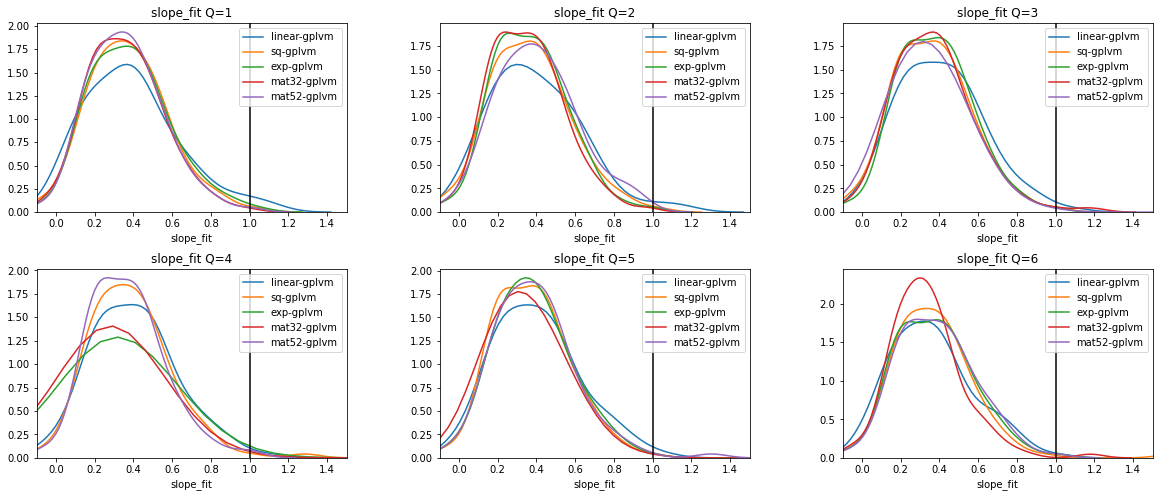

In [34]:
model_numbers = [1, 2, 3, 4, 5]
plot_variable('slope_fit', model_numbers, gplvm=True, studt=None, xlim=[-0.1, 1.5], vline=1.)

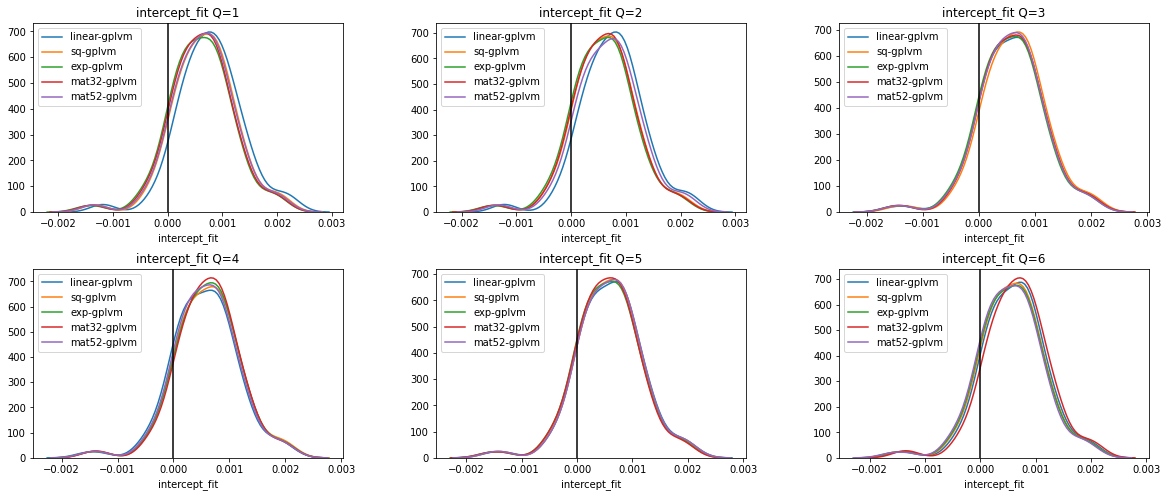

In [36]:
model_numbers = [1, 2, 3, 4, 5]
plot_variable('intercept_fit', model_numbers, gplvm=True, studt=None, vline=0.)

### StudT

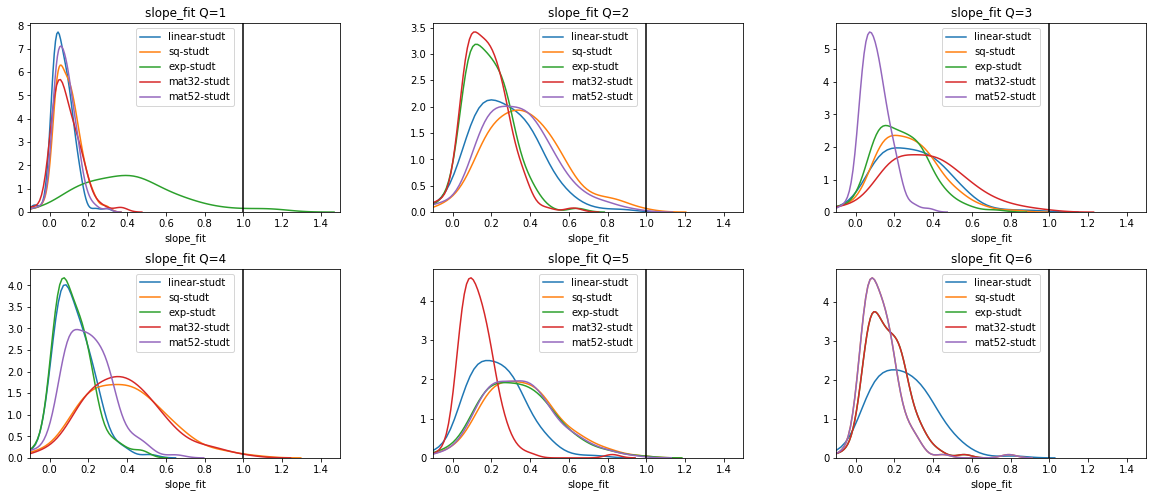

In [37]:
model_numbers = [1, 2, 3, 4, 5]
plot_variable('slope_fit', model_numbers, gplvm=None, studt=True, xlim=[-0.1, 1.5], vline=1.)

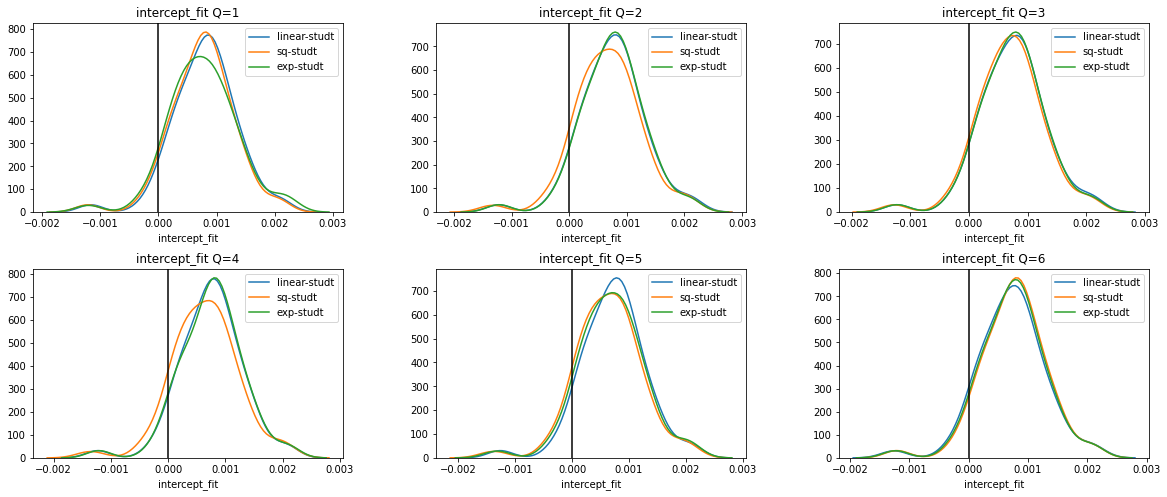

In [35]:
model_numbers = [1, 2, 3, 4, 5]
plot_variable('intercept_fit', model_numbers, gplvm=None, studt=True, vline=0.)

# Compare Vola Model with Time Model

In [ ]:
models = {1:'linear', 2:'sq', 3:'exp', 4:'mat32', 5:'mat52'}
Q_max, N = 6, 120
path_vola_10 = f'gplvm_vola/2010-N10-D249/'
path_time_10 = f'gplvm_time/2010-N10-D249/'

data_vola, data_time = {}, {}
for q in range(1, Q_max+1):
    for model_n in models.keys():
        data_vola[f'Q{q}_K{model_n}'] = pd.read_csv(path_vola_10+f'diagnostics/comparison_Q{q}_kernel{model_n}.csv')
        data_time[f'Q{q}_K{model_n}'] = pd.read_csv(path_time_10+f'diagnostics/comparison_Q{q}_kernel{model_n}.csv')

returns = get_returns(returns_no=)
Y = returns.T.values
N,D=Y.shape
Y_T = pd.DataFrame(Y, index=range(1,N+1), columns = range(1,D+1))

Yhat_vola, Yhat_time = {}, {}
for q in range(1,Q_max+1):
    for model_n in models.keys():
        Yhat_vola[f'Q{q}_K{kernel_n}'] = pd.read_csv(path_vola_10+f'samples/Y_hat_Q{q}_kernel{model_n}.csv')
        Yhat_time[f'Q{q}_K{kernel_n}'] = pd.read_csv(path_time_10+f'samples/Y_hat_Q{q}_kernel{model_n}.csv')

## Sanity Checks 

## VOLA

In [ ]:
model_numbers = [1, 2, 3, 4, 5]
plot_variable('slope_fit', model_numbers, gplvm=True, studt=None, xlim=[-0.1, 1.5], vline=1.)

In [ ]:
model_numbers = [1, 2, 3, 4, 5]
plot_variable('intercept_fit', model_numbers, gplvm=True, studt=None, vline=0.)

## TIME 

In [ ]:
model_numbers = [1, 2, 3, 4, 5]
plot_variable('slope_fit', model_numbers, gplvm=True, studt=None, xlim=[-0.1, 1.5], vline=1.)

In [ ]:
model_numbers = [1, 2, 3, 4, 5]
plot_variable('intercept_fit', model_numbers, gplvm=True, studt=None, vline=0.)